<a href="https://colab.research.google.com/github/SambhavVinay/Pebbles_Shells_BinaryML/blob/main/Pebbles_Shells_BinaryML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
import os, zipfile

In [3]:
with zipfile.ZipFile("shells.zip",'r') as r:
  r.extractall(".")

In [4]:
base_dir = os.path.join("/content",'shells')
train_dir = "/content/train"
test_dir = "/content/test"

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
size = (150,150)

In [6]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [7]:
train_gen = train_datagen.flow_from_directory(
    train_dir,
    target_size = size,
    batch_size = 20,
    class_mode = 'binary'
)
test_gen = test_datagen.flow_from_directory(
    test_dir,
    target_size = size,
    batch_size = 20,
    class_mode = 'binary'
)

Found 4284 images belonging to 2 classes.
Found 4284 images belonging to 2 classes.


In [8]:
print(train_gen)
print(test_gen)

In [9]:
from tensorflow.keras import models, layers

In [12]:
model = models.Sequential([
    layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(128,(3,3),activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])


In [13]:
model.compile(optimizer='adam',loss='binary_crossentropy', metrics = ['accuracy'])

In [14]:
history = model.fit(
    train_gen,
    validation_data = test_gen,
    epochs = 10
)

Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


215/215 ━━━━━━━━━━━━━━━━━━━━ 32s 123ms/step - accuracy: 0.6318 - loss: 0.6988 - val_accuracy: 0.6760 - val_loss: 0.6634
Epoch 2/10
215/215 ━━━━━━━━━━━━━━━━━━━━ 21s 96ms/step - accuracy: 0.6782 - loss: 0.6018 - val_accuracy: 0.7290 - val_loss: 0.5651
Epoch 3/10
215/215 ━━━━━━━━━━━━━━━━━━━━ 22s 100ms/step - accuracy: 0.7281 - loss: 0.5443 - val_accuracy: 0.7509 - val_loss: 0.4869
Epoch 4/10
215/215 ━━━━━━━━━━━━━━━━━━━━ 32s 149ms/step - accuracy: 0.7681 - loss: 0.4802 - val_accuracy: 0.7918 - val_loss: 0.4599
Epoch 5/10
215/215 ━━━━━━━━━━━━━━━━━━━━ 32s 151ms/step - accuracy: 0.8162 - loss: 0.4142 - val_accuracy: 0.8889 - val_loss: 0.2779
Epoch 6/10
215/215 ━━━━━━━━━━━━━━━━━━━━ 32s 150ms/step - accuracy: 0.8874 - loss: 0.2740 - val_accuracy: 0.9456 - val_loss: 0.1557
Epoch 7/10
215/215 ━━━━━━━━━━━━━━━━━━━━ 22s 101ms/step - accuracy: 0.9493 - loss: 0.1504 - val_accuracy: 0.9704 - val_loss: 0.1166
Epoch 8/10
215/215 ━━━━━━━━━━━━━━━━━━━━ 21s 100ms/step - accuracy: 0.9717 - loss: 0.0860 - val_

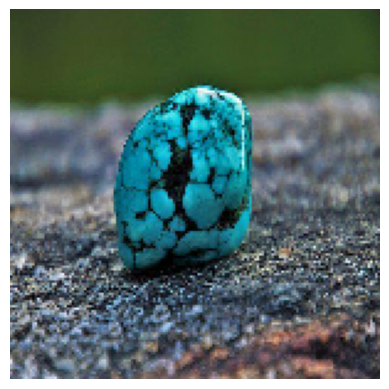

Label (numeric): 0.0
Label (class name): Pebbles


In [16]:
import matplotlib.pyplot as plt
import numpy as np

images, labels = next(train_gen)

plt.imshow(images[0])
plt.axis("off")
plt.show()

print("Label (numeric):", labels[0])
print("Label (class name):", list(train_gen.class_indices.keys())[int(labels[0])])

In [17]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │     9,470,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 28,691,141 (109.45 MB)

 Trainable params: 9,563,713 (36.48 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 19,127,428 (72.97 MB)

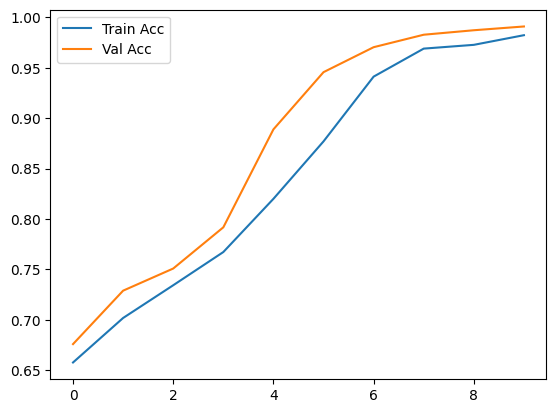

In [20]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend()
plt.show()

Saving download (11).jpeg to download (11) (1).jpeg
Saving download (10).jpeg to download (10).jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


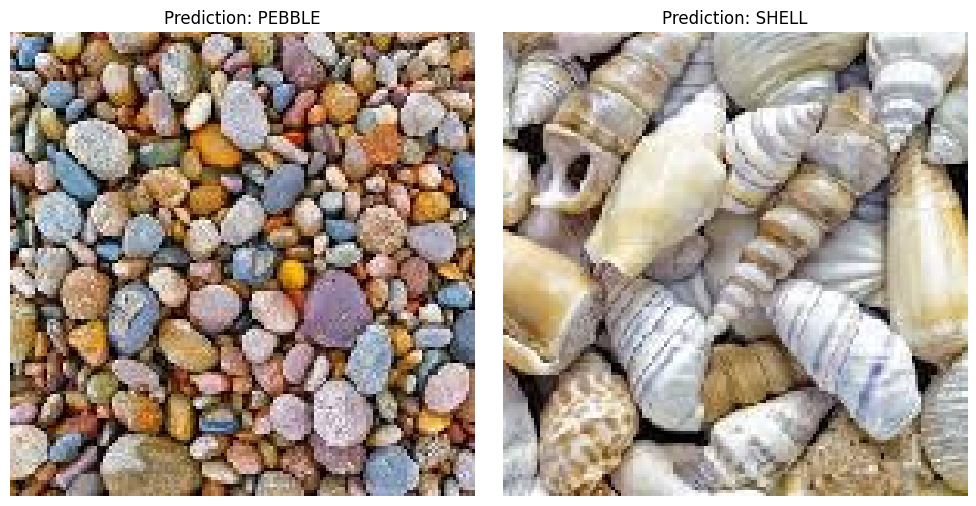

In [19]:
from google.colab import files
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt


uploaded = files.upload()


plt.figure(figsize=(10, 5))

for i, fn in enumerate(uploaded.keys()):

    img = image.load_img(fn, target_size=(150, 150))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0


    pred = model.predict(img_array)[0][0]
    label = "SHELL" if pred > 0.5 else "PEBBLE"


    plt.subplot(1, len(uploaded), i + 1)
    plt.imshow(img)
    plt.axis("off")
    plt.title(f"Prediction: {label}")

plt.tight_layout()
plt.show()
